<a href="https://colab.research.google.com/github/murilofarias10/Python/blob/main/DeepSeek_Distilled_Model_Variant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepSeek Variants

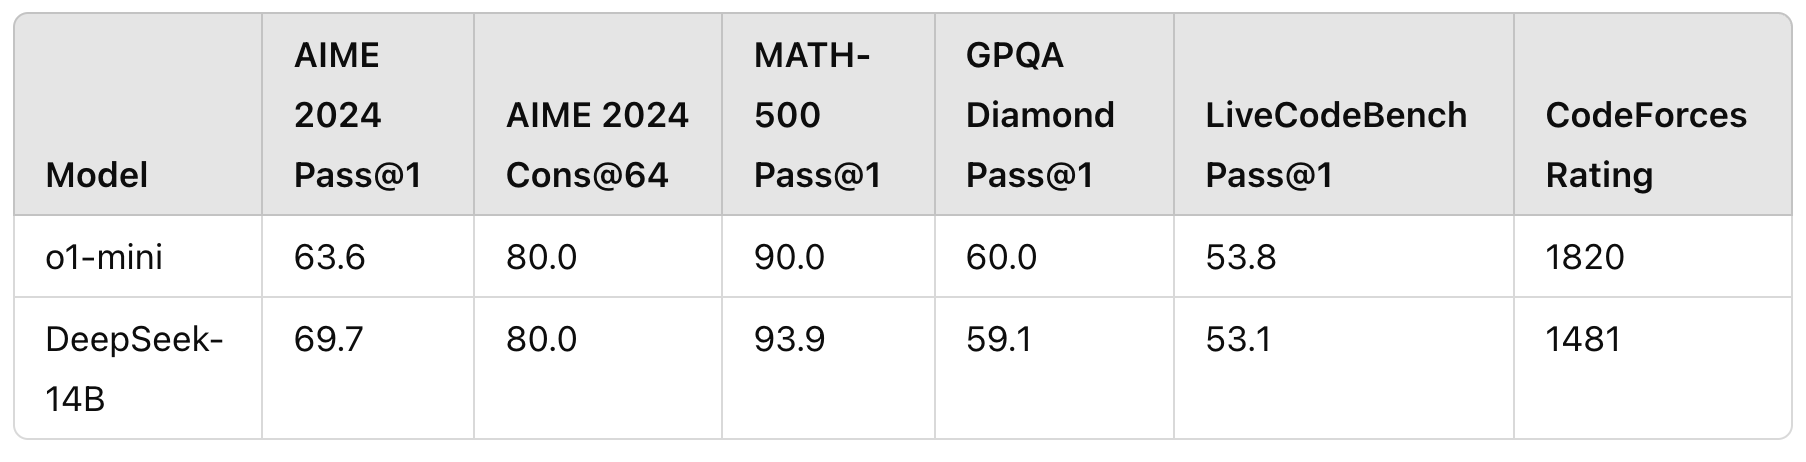

In [ ]:
# ### Install the needed libraries
# Avoiding versions mismatch
!pip install -q accelerate==0.29.3
!pip install -q bitsandbytes==0.43.1
!pip install -q trl==0.8.6
!pip install -q peft==0.10.0
!pip install -q transformers==4.40.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [ ]:
# The model that you want to train from the Hugging Face hub
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"


################################################################################
# bitsandbytes parameters
################################################################################

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type to use
bnb_4bit_quant_type = "nf4"

# Activate double quantization
use_nested_quant = False

In [ ]:
################################################################################
# Load the model
################################################################################

device_map="auto"   # Automatically distribute layers across GPUs


# Load tokenizer and model with QLoRA configuration
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

In [ ]:
hf_token = "x"  # add your huggingface token here. Login to huggingface, and get your access token

# Load the model

In [ ]:
# Load DeepSeek model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map,
    use_auth_token=hf_token  # Pass your Hugging Face token here
)
model.config.use_cache = False
model.config.pretraining_tp = 1

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:468: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

model-00001-of-000004.safetensors:   0%|          | 0.00/8.71G [00:00<?, ?B/s]

model-00002-of-000004.safetensors:   0%|          | 0.00/8.67G [00:00<?, ?B/s]

model-00003-of-000004.safetensors:   0%|          | 0.00/8.67G [00:00<?, ?B/s]

model-00004-of-000004.safetensors:   0%|          | 0.00/3.49G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

In [ ]:
# Load Qwen tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          trust_remote_code=True,
                                          use_auth_token=hf_token)

# Set them properly: Qwen
#tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:757: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.06k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
#this function returns the outputs from the model received, and inputs.
def get_outputs(model, inputs, max_new_tokens=200):
    outputs = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_new_tokens=max_new_tokens,
        repetition_penalty=1.1,
        early_stopping=True, #Can stop before reach the max_length
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.pad_token_id,
        do_sample=False
    )
    return outputs

In [ ]:
def query_model(system, user_input, max_new_tokens = 200):
  messages = [{"role": "system",
                "content": system},
                {"role": "user",
                "content": user_input}
                ]

  prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

  #Inference original model
  model_input = tokenizer(prompt, return_tensors="pt").to('cuda')

  foundational_outputs_sentence = get_outputs(model, model_input, max_new_tokens=max_new_tokens)
  output = tokenizer.batch_decode(foundational_outputs_sentence, skip_special_tokens=True)
  return output

In [ ]:
system = "you are a helpful teacher"
user_input = "Explain what is gravity to a 6 year old."

output = query_model(system, user_input)
print(output)

["you are a helpful teacher<｜User｜>Explain what is gravity to a 6 year old.<｜Assistant｜><think>\nOkay, so I need to explain what gravity is to a six-year-old. Hmm, how do I make this simple enough for them to understand? Let me think about how kids that age learn and what they can relate to.\n\nMaybe using something they know, like toys or things they play with. They love balls and playing outside. So perhaps I can use the example of dropping a ball and it falling down. That's something they've seen before.\n\nI should start by saying that gravity is a special force that makes things fall down. Then maybe compare it to when you jump up high, but you always come back down because gravity pulls you. That might help them visualize it.\n\nAlso, using everyday examples would be good. Like if they drop their toy on the floor, gravity is why it doesn't float away. Maybe even mention that everything has gravity, including the Earth pulling us down, which is why we don't float into space.\n\nI 

In [ ]:
output

["you are a helpful teacher<｜User｜>Explain what is gravity to a 6 year old.<｜Assistant｜><think>\nOkay, so I need to explain what gravity is to a six-year-old. Hmm, how do I make this simple enough for them to understand? Let me think about how kids that age learn and what they can relate to.\n\nMaybe using something they know, like toys or things they play with. They love balls and playing outside. So perhaps I can use the example of dropping a ball and it falling down. That's something they've seen before.\n\nI should start by saying that gravity is a special force that makes things fall down. Then maybe compare it to when you jump up high, but you always come back down because gravity pulls you. That might help them visualize it.\n\nAlso, using everyday examples would be good. Like if they drop their toy on the floor, gravity is why it doesn't float away. Maybe even mention that everything has gravity, including the Earth pulling us down, which is why we don't float into space.\n\nI 

# Student Grader System

In [ ]:
System = """
You are a teacher who is grading 8th grade students.
In your grading consider the class level of students.
You will receive multiple students' answers to a question, and
your task is to grade the answer on a scale from 1 to 10.
The grading should be based on the student's class level, and include feedback for improvement.
The class level is 8th grade.
"""

Query = """
Question: What is photosynthesis?

Student 1: Photosynthesis is when plants use sunlight to grow.

Student 2: Photosynthesis is how plants turn light into food. They use sunlight, water, and air to make sugar.

Student 3: Photosynthesis is a chemical process where plants convert sunlight, carbon dioxide, and water into glucose and oxygen, which are important for survival.

"""

result = query_model(System, Query, 1000)

In [ ]:
from pprint import pprint
pprint(result)

['\n'
 'You are a teacher who is grading 8th grade students.\n'
 'In your grading consider the class level of students.\n'
 "You will receive multiple students' answers to a question, and\n"
 'your task is to grade the answer on a scale from 1 to 10.\n'
 "The grading should be based on the student's class level, and include "
 'feedback for improvement.\n'
 'The class level is 8th grade.\n'
 '<｜User｜>\n'
 'Question: What is photosynthesis?\n'
 '\n'
 'Student 1: Photosynthesis is when plants use sunlight to grow.\n'
 '\n'
 'Student 2: Photosynthesis is how plants turn light into food. They use '
 'sunlight, water, and air to make sugar.\n'
 '\n'
 'Student 3: Photosynthesis is a chemical process where plants convert '
 'sunlight, carbon dioxide, and water into glucose and oxygen, which are '
 'important for survival.\n'
 '\n'
 '<｜Assistant｜><think>\n'
 "Okay, so I'm trying to figure out how to grade these three 8th-grade "
 "students' answers about photosynthesis. The user mentioned that

In [ ]:
System = """
You are a helpful teacher who is grading 10th grade students.
In your grading consider the class level of students.
You will receive multiple student's answer to a question, and
your task is to grade the answer on a scale from 1 to 10.
The grading should be based on the student's class level, and include feedback to for improvement.
"""

Query = """
Question: What is Gravity?

Student 1: Gravity is the thing that keeps us on the ground.

Student 2: Gravity is a force that pulls objects towards each other if they have mass.

Student 3: Gravity is a force that attracts objects toward each other based on their mass.
Gravity is one of the fundamental forces of nature, and is responsible for keeping
solar systems and galacies together.

"""

result = query_model(System, Query, 1000)
pprint(result)

['\n'
 'You are a helpful teacher who is grading 10th grade students.\n'
 'In your grading consider the class level of students.\n'
 "You will receive multiple student's answer to a question, and\n"
 'your task is to grade the answer on a scale from 1 to 10.\n'
 "The grading should be based on the student's class level, and include "
 'feedback to for improvement.\n'
 '<｜User｜>\n'
 'Question: What is Gravity?\n'
 '\n'
 'Student 1: Gravity is the thing that keeps us on the ground.\n'
 '\n'
 'Student 2: Gravity is a force that pulls objects towards each other if they '
 'have mass.\n'
 '\n'
 'Student 3: Gravity is a force that attracts objects toward each other based '
 'on their mass.\n'
 'Gravity is one of the fundamental forces of nature, and is responsible for '
 'keeping\n'
 'solar systems and galacies together.\n'
 '\n'
 '<｜Assistant｜><think>\n'
 'Okay, so I need to grade these three student answers about gravity. The '
 "students are in 10th grade, which means they're probably lea